In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis import align
import matplotlib.pyplot as plt
import numpy as np
from MDAnalysis.analysis import rdf

In [2]:
u = mda.Universe("solvate.psf","Acetone_water_MetaD.dcd")

/home/praveen/miniconda3/lib/python3.9/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [3]:
O1 = u.select_atoms("resname ACO S4801 and name O1")

In [4]:
O2 = u.select_atoms("resname TIP3 and name OH2")
print(O2.atoms)
print(O2.n_atoms)

<AtomGroup [<Atom 11: OH2 of type OT of resname TIP3, resid 5 and segid WT1>, <Atom 14: OH2 of type OT of resname TIP3, resid 7 and segid WT1>, <Atom 17: OH2 of type OT of resname TIP3, resid 21 and segid WT1>, ..., <Atom 998: OH2 of type OT of resname TIP3, resid 9226 and segid WT1>, <Atom 1001: OH2 of type OT of resname TIP3, resid 9241 and segid WT1>, <Atom 1004: OH2 of type OT of resname TIP3, resid 9250 and segid WT1>]>
332


In [5]:
irdf = rdf.InterRDF(O1,O2, nbins = 75, range = (0.0,10.0))

In [6]:
irdf.run()

/home/praveen/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/home/praveen/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


Text(0.5, 1.0, 'MD Analysis')

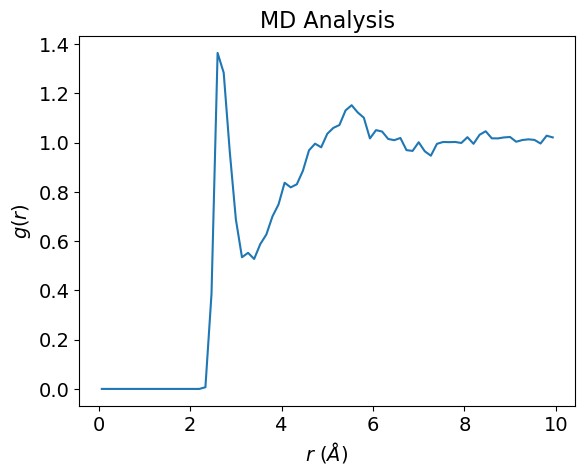

In [23]:
plt.plot(irdf.bins, irdf.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.xlabel('$r$ $(\AA) $ ',fontsize=14)
plt.ylabel('$g(r)$',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("MD Analysis",fontsize=16)

In [8]:
vmd_data = np.loadtxt("gofr_vmd.dat")

Text(0.5, 1.0, 'VMD')

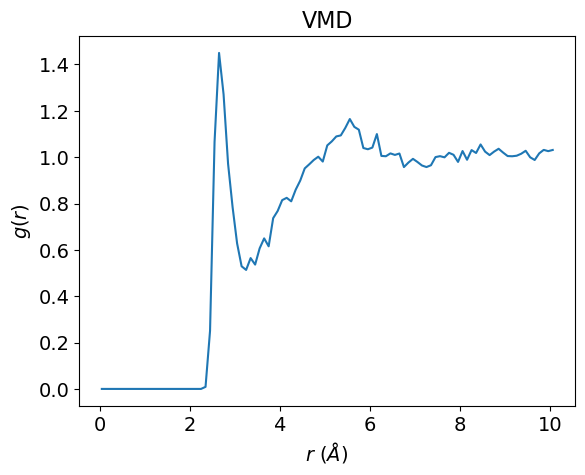

In [22]:
plt.plot(vmd_data[:,0],vmd_data[:,1])
plt.xlabel('$r$ $(\AA) $ ',fontsize=14)s
plt.ylabel('$g(r)$',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("VMD",fontsize=16)

/home/praveen/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/home/praveen/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


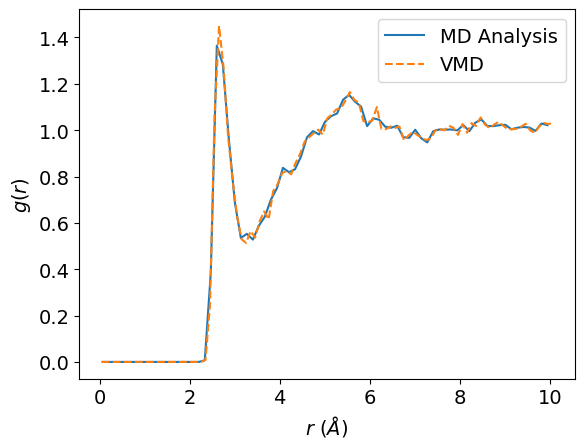

In [19]:
plt.plot(irdf.bins, irdf.rdf,label ="MD Analysis")
plt.xlabel('$r$ $(\AA) $ ',fontsize=14)
plt.ylabel('$g(r)$',fontsize=14)
plt.plot(vmd_data[:,0],vmd_data[:,1], '--', label = "VMD",)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.savefig("Radial_MDA_VMD.jpg")